In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable 
pd.options.display.max_columns=None

## Preguntas propuestas
Ve qués se cobra generalmente para este campo. Buscar para analistas y business intelligence en Europa. Ver también diferencias entre géneros. Mujeres y hombres trabajando en el sector (con un quesito). Años de experiencia por géneros, ver si las mujeres se han ido incorporando más a este mercado o no. Ver nivel de estudios en relación con el puesto que ocupa Y los años experiencia.

Estudio de mercado: Las personas que trabajan de estos puestos: tamaño empresa, industria... 
Machine learning: Cuánto invierten realmente en *Machine Learning*.

Qué herramientas utilizan (realizar para todas las columnas).

Hacer un filtro:

.isin(): puestos - data analyst y business intelligence. Ver todas las herramientas de manera general. Hacerlo con **todas**. 
Filtro por género para buscar por mujeres. 
- Un dataframe para ver las herramientas: 
    - cómo varían las herramientas según los años de experiencia.


Brecha salarial para mujeres y hombres en el mismo puesto. A tener en cuenta: mismos años, mismo puesto... ver si hay diferencia de salario real.

Años de las mujeres que estén trabajando en el sector, para ver si hay edades que trabajen menos por cuestiones de maternidad, etc. 


¿Qué tipo de gráficas vamos a querer?

- Graficas que hay:
    - Barras. Las barras apiladas para poder los años de experiencia que tienen los hombres vs. mujeres, para comprobar si los hombres se mantienen en el sector más o menos que las mujeres.
    - Dispersión. Quizá para ver la brecha salarial entre géneros, u otras cosas. 
    - Histogramas. Por ejemplo, para ver las edades, para las herramientas...
    - Sectores(quesitos): Géneros en el sector. 
    - Violín. No vemos utilidad.
    - De caja. No vemos utilidad. 

In [2]:
def quitar_espacios(elemento):
    '''
    Esta función recoge elemento a elemento de una columna, quita los espacios de los lados y
    devuelve el string modificado'''
    try:
        return elemento.strip()
    except:
        return np.nan

In [3]:
def explode_strip(dataframe,columna):
    ''' 
    Esta función recoge el dataframe y la columna a modificar. Hace un explode de esa columna y quita los espacios de cada elemento.
    Devuelve el dataframe modificado.'''
    dataframe2 = dataframe.explode(columna)
    dataframe2[columna] = dataframe2[columna].apply(quitar_espacios)
    return dataframe2

In [4]:
def grafica(dataframe,columna,nombre,lista_nombres):
    df_grafica = explode_strip(dataframe,columna)
    plt.figure(figsize= (3,8))
    fig = sns.barplot(y = df_grafica[columna].value_counts().index, x = df_grafica[columna].value_counts(), data = df_grafica, palette = 'pastel')
    fig.set_ylabel('', fontweight = "bold", fontsize = 11)
    fig.set_xlabel('', fontweight = "bold", fontsize = 11)

    fig.set_title(nombre, fontweight = "bold", fontsize = 12)
    fig.set_yticklabels(lista_nombres)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False);

In [5]:
def saber_unicos(dataframe,columna):
    df_grafica = explode_strip(dataframe,columna)
    valores_unicos = df_grafica[columna].value_counts().index
    return valores_unicos

## Importante

- Crear el Dataframe sólo con los países de Europa.
- Quedarnos únicamente con Data Analyst y con Business Intelligence 

In [6]:
df = pd.read_pickle('archivos_resultantes/dataframe_graficas.pkl')
df.sample(1)

,id_survey,time,age,gender,country,studies,position,years_programming,preferred_language,computing_platform,times_use_tpu,years_use_ml,industry,company_size,da_employees,company_ml,year_salary,investment_ml,main_bd,main_bi,main_da,duties,best_cloud_services,regular_automl_a,data_storage_products_b
8945,8945,691,45-49,Man,Netherlands,Bachelor’s degree,Data Analyst,Architect,Python,A laptop,Never,Not use,Computers/Technology,Macro,20+,Well established,unknown,unknown,unknown,unknown,Not use/Unknown,Analyze and understand data to influence produ...,unknown,unknown,unknown


In [7]:
df_explode = pd.read_pickle('archivos_resultantes/dataframe_graficas_explode.pkl')
df_explode.head(1)

,id_survey,programming_languages,ide,hardware,visualization,ml_tools,ml_algorithm,bd_a,bi,notebooks,computer_vision,nlp,cloud_platforms_a,cloud_product_a,data_storage_products_a,ml_products_a,automated_ml_tools_a,ml_experiments_a,sharing,courses,media,cloud_platforms_b,cloud_products_b,ml_products_b,bd_b,bi_b,automated_ml_tools_b,regular_automl_b,ml_experiments_b
16,16,"[Python, SQL]","[Jupyter , Jupyter Notebook]",[None],"[Matplotlib , Seaborn , Plotly / Plotly Express]",[Scikit-learn],[Linear or Logistic Regression],[unknown],[unknown],"[Kaggle Notebooks, Colab Notebooks, Databrick...",[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],[unknown],"[Coursera, Kaggle Learn Courses, Cloud-certifi...","[Kaggle , Blogs]",[IBM Cloud / Red Hat],[unknown],[Databricks],[Microsoft Azure SQL Database],"[Microsoft Power BI, Google Data Studio, Table...","[Automated data augmentation , Automated featu...","[Google Cloud AutoML , H2O Driverless AI , ...","[Neptune.ai , Weights & Biases , Comet.ml , ..."


### Gráfico brecha de género.

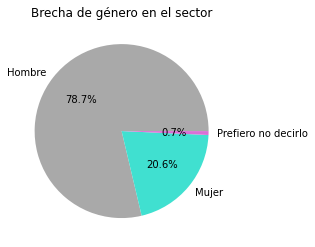

In [8]:
fig = plt.pie(df['gender'].value_counts()[:3],labels= ['Hombre','Mujer','Prefiero no decirlo'],autopct='%1.1f%%',  colors = ['darkgrey','turquoise','orchid']);
plt.title('Brecha de género en el sector');

Como se puede observar, hay una gran mayoría de hombres en el sector de análisis de datos.

### Años programando por género

In [9]:
df.stb.freq(['years_programming','gender'])

,years_programming,gender,count,percent,cumulative_count,cumulative_percent
0,Junior,Man,234,42.010772,234,42.010772
1,Architect,Man,76,13.644524,310,55.655296
2,Mid-level,Man,68,12.208259,378,67.863555
3,Junior,Woman,65,11.669659,443,79.533214
4,Senior,Man,40,7.181329,483,86.714542
5,No code,Man,18,3.231598,501,89.946140
6,Mid-level,Woman,15,2.692998,516,92.639138
7,Architect,Woman,13,2.333932,529,94.973070
8,Senior,Woman,12,2.154399,541,97.127469
9,No code,Woman,9,1.615799,550,98.743268


In [10]:
lista_años_programando = ['No code','Junior','Mid-level','Senior','Architect']

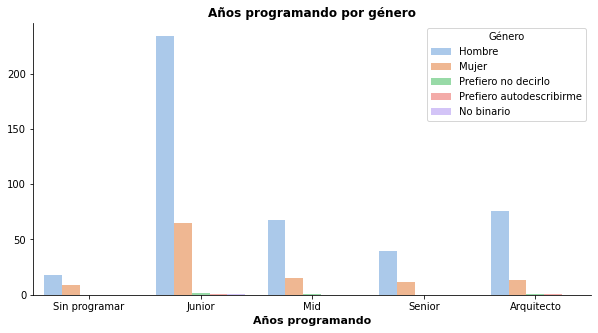

In [11]:
plt.figure(figsize= (10,5))
fig = sns.countplot(x='years_programming',hue='gender',data=df,order=lista_años_programando,palette='pastel')
fig.set_xlabel('Años programando', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Años programando por género', fontweight = "bold", fontsize = 12)
plt.legend(title='Género',labels=['Hombre','Mujer','Prefiero no decirlo','Prefiero autodescribirme','No binario'])
fig.set_xticklabels(['Sin programar','Junior','Mid','Senior','Arquitecto'])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Lenguajes de programación favoritos

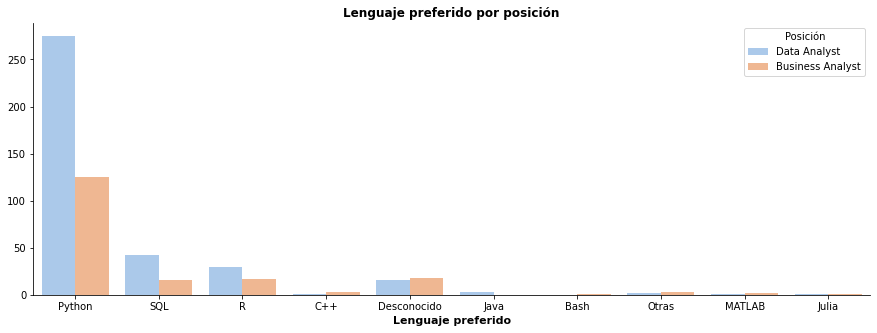

In [12]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='preferred_language',hue='position',data=df,palette='pastel')
fig.set_xlabel('Lenguaje preferido', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Lenguaje preferido por posición', fontweight = "bold", fontsize = 12)

plt.legend(title='Posición')

fig.set_xticklabels(['Python', 'SQL', 'R', 'C++', 'Desconocido', 'Java', 'Bash', 'Otras','MATLAB', 'Julia'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Salarios

In [13]:
salarios = ['unknown', '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
    '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
    '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
    '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
    '200,000-249,999', '250,000-299,999', '>1,000,000']

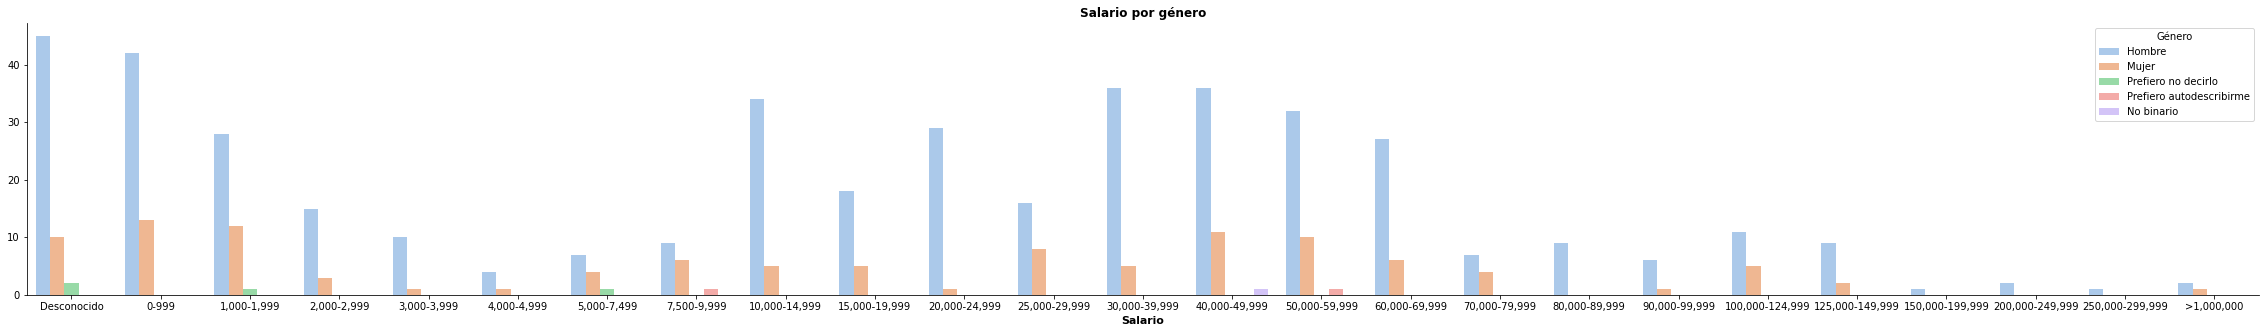

In [14]:
plt.figure(figsize= (40,5))
fig = sns.countplot(x='year_salary', hue='gender', data=df,order=salarios,palette = 'pastel')
fig.set_xlabel('Salario', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Salario por género', fontweight = "bold", fontsize = 12)

plt.legend(title='Género',labels=['Hombre','Mujer','Prefiero no decirlo','Prefiero autodescribirme','No binario'])

fig.set_xticklabels(['Desconocido', '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
    '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
    '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
    '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
    '200,000-249,999', '250,000-299,999', '>1,000,000'])
    
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Años programando

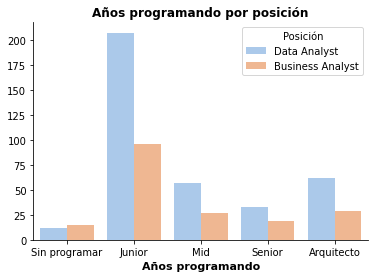

In [15]:
fig = sns.countplot(x='years_programming',hue='position',data=df,order=lista_años_programando,palette = 'pastel')
fig.set_xlabel('Años programando', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Años programando por posición', fontweight = "bold", fontsize = 12)

plt.legend(title='Posición')
fig.set_xticklabels(['Sin programar','Junior','Mid','Senior','Arquitecto'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Estudios

In [16]:
lista_estudios = ['Master’s degree','Bachelor’s degree','Doctoral degree','University study, no bachelor','High school','Not answer','Professional doctorate']

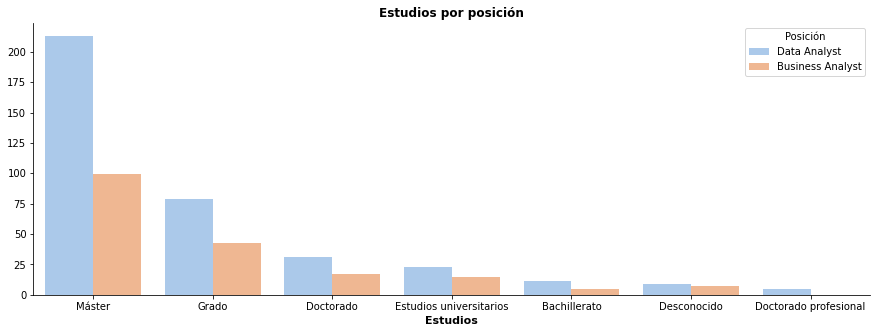

In [17]:
plt.figure(figsize= (15,5))
fig = sns.countplot(x='studies',hue='position',data=df,order=lista_estudios,palette = 'pastel')
fig.set_xlabel('Estudios', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Estudios por posición', fontweight = "bold", fontsize = 12)
plt.legend(title='Posición')
fig.set_xticklabels(['Máster','Grado','Doctorado','Estudios universitarios','Bachillerato','Desconocido','Doctorado profesional'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

### Edad por género

In [18]:
lista_años = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69']

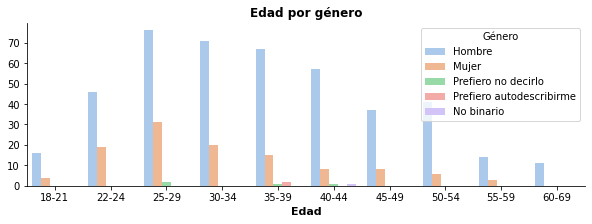

In [19]:
plt.figure(figsize= (10,3))
fig = sns.countplot(x='age',hue='gender',data=df,order=lista_años,palette = 'pastel')
fig.set_xlabel('Edad', fontweight = "bold", fontsize = 11)
fig.set_ylabel('', fontweight = "bold", fontsize = 11)

fig.set_title('Edad por género', fontweight = "bold", fontsize = 12)
plt.legend(title='Género',labels=['Hombre','Mujer','Prefiero no decirlo','Prefiero autodescribirme','No binario'])

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False);

In [20]:
df.stb.freq(['age','gender'])

,age,gender,count,percent,cumulative_count,cumulative_percent
0,25-29,Man,76,13.644524,76,13.644524
1,30-34,Man,71,12.746858,147,26.391382
2,35-39,Man,67,12.028725,214,38.420108
3,40-44,Man,57,10.233393,271,48.653501
4,22-24,Man,46,8.258528,317,56.912029
5,50-54,Man,41,7.360862,358,64.272890
6,45-49,Man,37,6.642729,395,70.915619
7,25-29,Woman,31,5.565530,426,76.481149
8,30-34,Woman,20,3.590664,446,80.071813
9,22-24,Woman,19,3.411131,465,83.482944


Investigar esto en otro sector.

### Herramientas

In [21]:
saber_unicos(df_explode,'programming_languages')

Index(['Python', 'SQL', 'R', 'Other', 'Javascript', 'Java', 'C++', 'Bash',
       'unknown', 'MATLAB', 'C', 'None', 'Julia', 'Swift'],
      dtype='object', name='programming_languages')

In [22]:
lista = ['Python', 'SQL', 'R', 'Otras', 'Javascript', 'Java', 'C++', 'Bash','Desconocido', 'MATLAB', 'C', 'None', 'Julia', 'Swift']

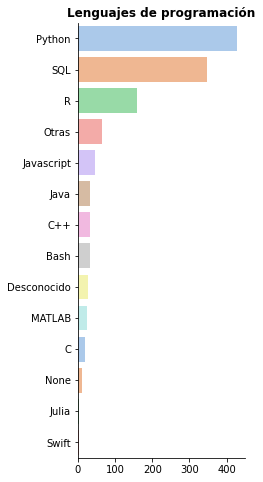

In [23]:
grafica(df_explode,'programming_languages','Lenguajes de programación', lista)

### ide

In [24]:
saber_unicos(df_explode,'ide')

Index(['Jupyter Notebook', 'PyCharm', 'RStudio', 'Visual Studio Code',
       'Jupyter', 'Notepad++', 'Spyder', 'Visual Studio', 'Sublime Text',
       'Other', 'unknown', 'Vim / Emacs', 'MATLAB', 'None'],
      dtype='object', name='ide')

In [25]:
lista = ['Jupyter Notebook', 'PyCharm', 'RStudio', 'Visual Studio Code','Jupyter', 'Notepad++', 'Spyder', 'Visual Studio', 'Sublime Text','Otras', 'Desconocido', 'Vim / Emacs', 'MATLAB', 'Ninguna']

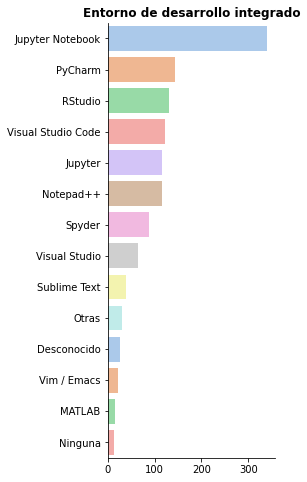

In [26]:
grafica(df_explode,'ide','Entorno de desarrollo integrado',lista)

### Visualización

In [27]:
saber_unicos(df_explode,'visualization')

Index(['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2',
       'None', 'Shiny', 'unknown', 'Geoplotlib', 'Bokeh', 'Other', 'D3 js',
       'Leaflet / Folium', 'Altair'],
      dtype='object', name='visualization')

In [28]:
lista = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2',
       'Ninguna', 'Shiny', 'unknown', 'Geoplotlib', 'Bokeh', 'Otras', 'D3 js',
       'Leaflet / Folium', 'Altair']

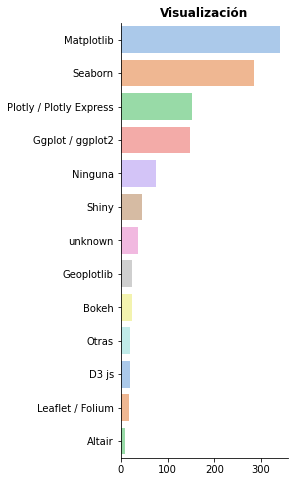

In [29]:
grafica(df_explode,'visualization','Visualización',lista)

### Productos de machine learning

In [30]:
saber_unicos(df_explode,'ml_products_a')

Index(['unknown', 'No / None', 'Azure Machine Learning Studio', 'Databricks',
       'Amazon SageMaker', 'Alteryx', 'DataRobot', 'Dataiku', 'Rapidminer',
       'Other', 'Google Cloud Vertex AI'],
      dtype='object', name='ml_products_a')

In [31]:
lista =['Desconocido', 'No / Ninguno', 'Azure Machine Learning Studio', 'Databricks',
       'Amazon SageMaker', 'Alteryx', 'DataRobot', 'Dataiku', 'Rapidminer',
       'Otras', 'Google Cloud Vertex AI']

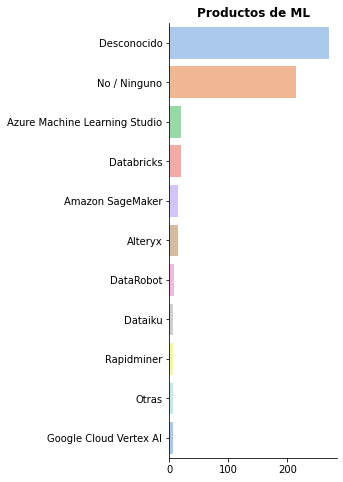

In [32]:
grafica(df_explode,'ml_products_a','Productos de ML',lista)

### Herramientas de machine learning

In [33]:
saber_unicos(df_explode,'ml_tools')

Index(['Scikit-learn', 'unknown', 'Xgboost', 'TensorFlow', 'Keras', 'PyTorch',
       'LightGBM', 'CatBoost', 'None', 'Caret', 'Prophet', 'Tidymodels',
       'PyTorch Lightning', 'H2O 3', 'Other', 'Fast.ai', 'Huggingface',
       'MXNet', 'JAX'],
      dtype='object', name='ml_tools')

In [34]:
lista = ['Scikit-learn', 'Desconocido', 'Xgboost', 'TensorFlow', 'Keras', 'PyTorch',
       'LightGBM', 'CatBoost', 'Ninguno', 'Caret', 'Prophet', 'Tidymodels',
       'PyTorch Lightning', 'H2O 3', 'Otras', 'Fast.ai', 'Huggingface',
       'MXNet', 'JAX']

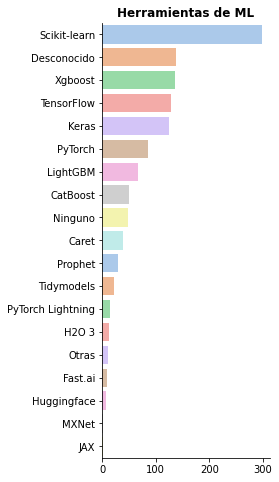

In [35]:
grafica(df_explode,'ml_tools','Herramientas de ML',lista)

### Notebooks

In [36]:
saber_unicos(df_explode,'notebooks')

Index(['unknown', 'Kaggle Notebooks', 'Colab Notebooks', 'Binder / JupyterHub',
       'Google Cloud Datalab', 'IBM Watson Studio', 'Google Cloud Notebooks',
       'Azure Notebooks', 'Other', 'Amazon Sagemaker Studio Notebooks',
       'Databricks Collaborative Notebooks', 'Zeppelin / Zepl Notebooks',
       'Observable Notebooks', 'Amazon EMR Notebooks', 'Paperspace / Gradient',
       'Deepnote Notebooks', 'Code Ocean'],
      dtype='object', name='notebooks')

In [37]:
lista =['Desconocido', 'Kaggle Notebooks', 'Colab Notebooks', 'Binder / JupyterHub',
       'Google Cloud Datalab', 'IBM Watson Studio', 'Google Cloud Notebooks',
       'Azure Notebooks', 'Otros', 'Amazon Sagemaker Studio Notebooks',
       'Databricks Collaborative Notebooks', 'Zeppelin / Zepl Notebooks',
       'Observable Notebooks', 'Amazon EMR Notebooks', 'Paperspace / Gradient',
       'Deepnote Notebooks', 'Code Ocean']

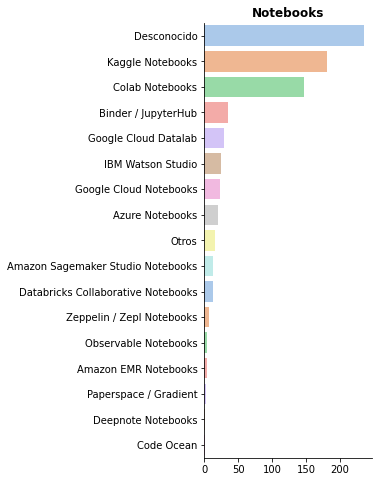

In [38]:
grafica(df_explode,'notebooks','Notebooks',lista)

### Cursos

In [39]:
saber_unicos(df_explode,'courses')

Index(['Kaggle Learn Courses', 'Coursera', 'Udemy', 'DataCamp', 'unknown',
       'University Courses', 'edX', 'Other', 'LinkedIn Learning', 'Udacity',
       'Cloud-certification programs', 'Fast.ai'],
      dtype='object', name='courses')

In [40]:
lista =['Kaggle Learn Courses', 'Coursera', 'Udemy', 'DataCamp', 'Desconocido',
       'University Courses', 'edX', 'Otras', 'LinkedIn Learning', 'Udacity',
       'Cloud-certification programs', 'Fast.ai']

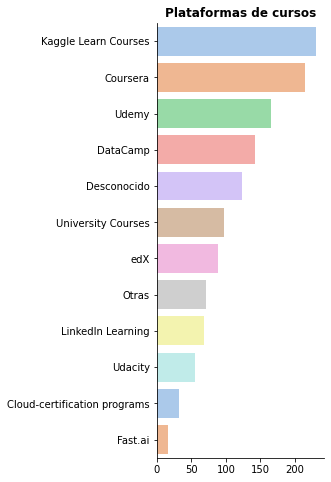

In [41]:
grafica(df_explode,'courses','Plataformas de cursos',lista)

### Herramientas BI

In [42]:
saber_unicos(df_explode, 'bi')

Index(['unknown', 'Microsoft Power BI', 'Tableau', 'None',
       'Google Data Studio', 'Qlik', 'Other', 'Tableau CRM', 'Alteryx',
       'Salesforce', 'SAP Analytics Cloud', 'Looker', 'Amazon QuickSight',
       'TIBCO Spotfire', 'Microsoft Azure Synapse', 'Sisense', 'Thoughtspot'],
      dtype='object', name='bi')

In [43]:
lista = ['Desconocido', 'Microsoft Power BI', 'Tableau', 'Ninguno',
       'Google Data Studio', 'Qlik', 'Other', 'Tableau CRM', 'Alteryx',
       'Salesforce', 'SAP Analytics Cloud', 'Looker', 'Amazon QuickSight',
       'TIBCO Spotfire', 'Microsoft Azure Synapse', 'Sisense', 'Thoughtspot']

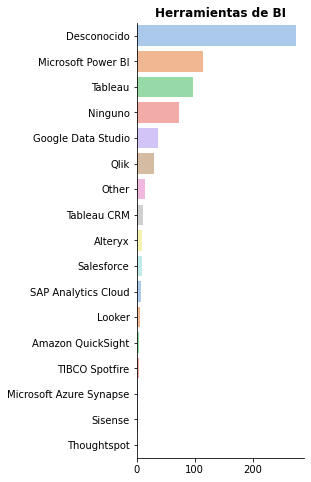

In [44]:
grafica(df_explode,'bi','Herramientas de BI', lista)

### Algoritmos de ML

In [45]:
saber_unicos(df_explode, 'ml_algorithm')

Index(['Linear or Logistic Regression', 'Decision Trees or Random Forests',
       'Gradient Boosting Machines', 'unknown', 'Bayesian Approaches',
       'Convolutional Neural Networks', 'Dense Neural Networks',
       'Recurrent Neural Networks', 'None', 'Transformer Networks',
       'Evolutionary Approaches', 'Generative Adversarial Networks', 'Other'],
      dtype='object', name='ml_algorithm')

In [46]:
lista = ['Linear or Logistic Regression', 'Decision Trees or Random Forests',
       'Gradient Boosting Machines', 'Desconocido', 'Bayesian Approaches',
       'Convolutional Neural Networks', 'Dense Neural Networks',
       'Recurrent Neural Networks', 'Ninguno', 'Transformer Networks',
       'Evolutionary Approaches', 'Generative Adversarial Networks', 'Otros']

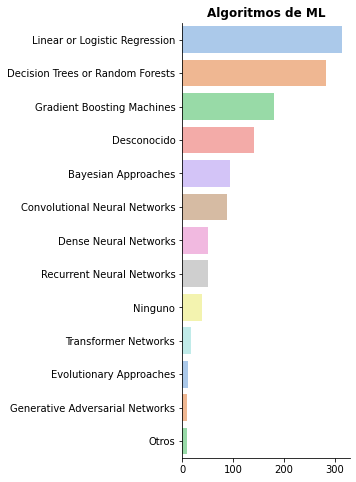

In [47]:
grafica(df_explode,'ml_algorithm','Algoritmos de ML', lista)

### Social Media

In [48]:
saber_unicos(df_explode, 'media')

Index(['Kaggle', 'YouTube', 'Blogs', 'unknown', 'Reddit', 'Email newsletters',
       'Twitter', 'Course Forums', 'Slack Communities', 'Podcasts',
       'Journal Publications', 'Other'],
      dtype='object', name='media')

In [49]:
lista = ['Kaggle', 'YouTube', 'Blogs', 'Desconocido', 'Reddit', 'Email newsletters',
       'Twitter', 'Foros de cursos', 'Comunidades de Slack', 'Podcasts',
       'Publicaciones científicas', 'Otros']

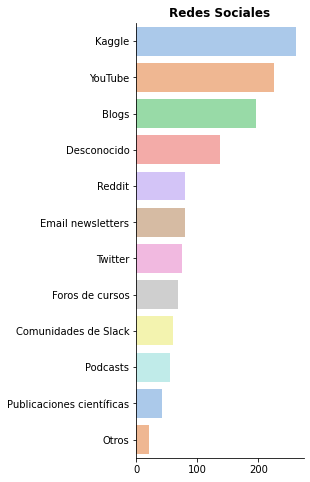

In [50]:
grafica(df_explode,'media','Redes Sociales', lista)

### Sharing Platforms

In [51]:
saber_unicos(df_explode, 'sharing')

Index(['unknown', 'I do not share my work publicly', 'GitHub', 'Kaggle',
       'Colab', 'Personal blog', 'Streamlit', 'Plotly Dash', 'Shiny', 'Other',
       'NBViewer'],
      dtype='object', name='sharing')

In [52]:
lista = ['Desconocido', 'No hago mi trabajo público', 'GitHub', 'Kaggle',
        'Colab', 'Personal blog', 'Streamlit', 'Plotly Dash', 'Shiny', 'Otros',
       'NBViewer']


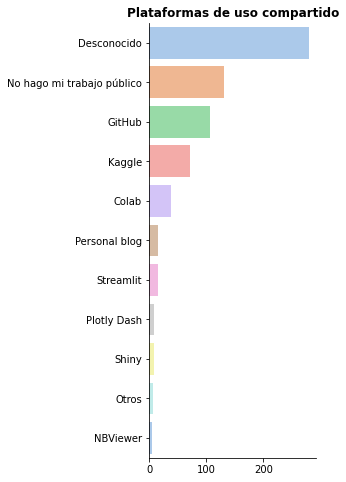

In [53]:
grafica(df_explode,'sharing','Plataformas de uso compartido', lista)